<h1 style="text-align:center">Visualisation et classification du dataset Covertype avec undersampling</h1>

<h2>Chargement du dataset</h2>

In [1]:
# Importer les bibliothèques nécessaires
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
import datetime as dt
import umap
from imblearn.under_sampling import RandomUnderSampler


C:\Users\coulmalme\PycharmProjects\TP2-Apprentissage_automatique\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Chargement du dataset
covertype = fetch_ucirepo(id=31)

# data
X = covertype.data.features
y = covertype.data.targets

In [4]:
print(X.shape)
print(y.shape)

print(y.Cover_Type.value_counts())

(581012, 54)
(581012, 1)
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [5]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2>Application de l'undersampling</h2>

In [7]:
# Appliquer RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_RandomUnderSampler, y_resampled_RandomUnderSampler = rus.fit_resample(X_scaled, y)
# Vérifiez la distribution après équilibrage
print(y_resampled_RandomUnderSampler.Cover_Type.value_counts())

Cover_Type
1    2747
2    2747
3    2747
4    2747
5    2747
6    2747
7    2747
Name: count, dtype: int64


<h2>Visualisation des données avec T-SNE et UMAP après application de l'undersampling</h2>

In [8]:
# Application de T-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_resampled_RandomUnderSampler)

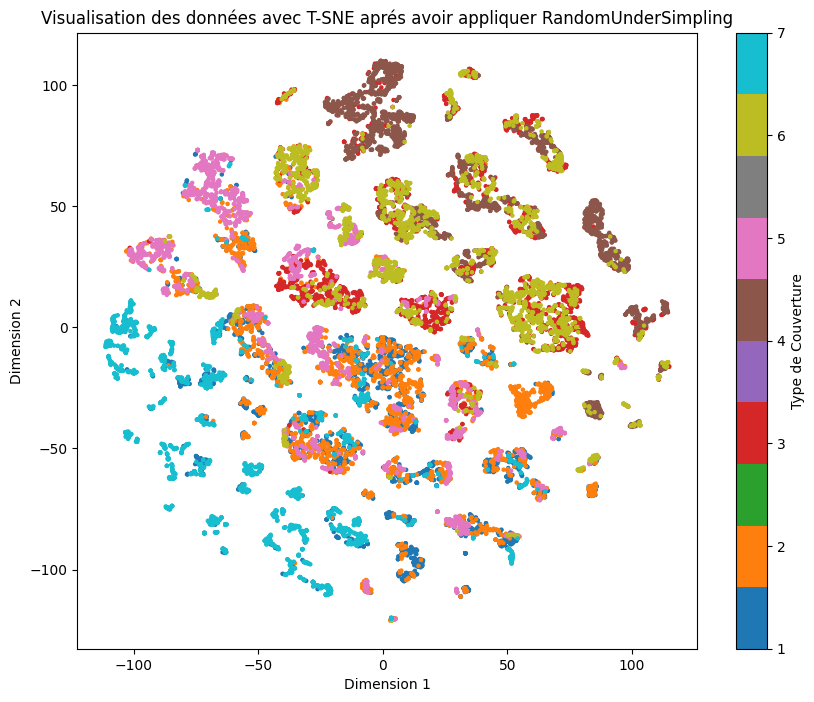

In [11]:
# Visualisation avec T-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_resampled_RandomUnderSampler.values.ravel(), cmap='tab10', s=5)
plt.colorbar(scatter, label='Type de Couverture')
plt.title("Visualisation des données avec T-SNE aprés avoir appliquer RandomUnderSimpling")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [12]:
### Algorithme UMAP
# Hyperparamètres (défaut: 5, 0.1, 2)
n_neighbors = 5
min_dist = 0.1
n_components = 2 # 2 pour 2D, 3 pour 3D

reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components)
embedding = reducer.fit_transform(X_resampled_RandomUnderSampler)
embedding.shape


C:\Users\coulmalme\PycharmProjects\TP2-Apprentissage_automatique\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\coulmalme\PycharmProjects\TP2-Apprentissage_automatique\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited at iteration 2000 with accuracies 
[5.59356085e-15 6.25747518e-08 4.98866046e-07 3.23754207e-05]
not reaching the requested tolerance 1.4007091522216797e-06.
Use iteration 1995 instead with accuracy 
3.452646161533341e-06.

  _, diffusion_map = lobpcg(
C:\Users\coulmalme\PycharmProjects\TP2-Apprentissage_automatique\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[3.36179198e-15 6.24668738e-08 4.95099881e-07 1.32530181e-05]
not reaching the requested tolerance 1.4007091522216797e-06.
  _, diffusion_map = lobpcg(


(19229, 2)

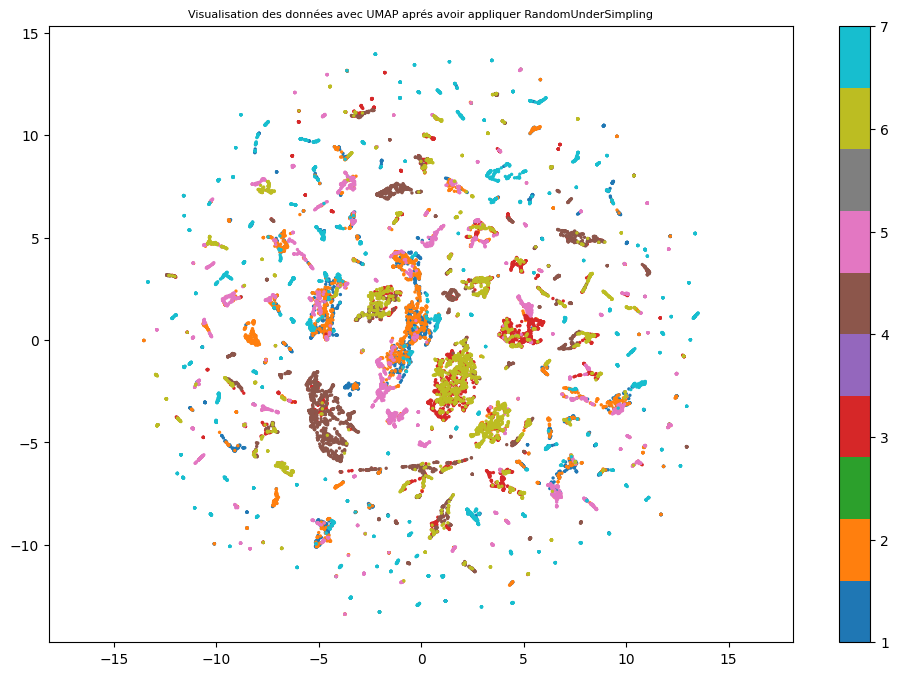

In [13]:
# Visualisation avec UMAP

if n_components == 3: # Affichage en 3D    
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], c=y_resampled_RandomUnderSampler.values.ravel(), s=1)
    # Ajout de la colorbar
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, aspect=10)
    cbar.set_label("Cover Type", fontsize=8)
    
elif n_components == 2: # Affichage en 2D
    plt.figure(figsize=(12,8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y_resampled_RandomUnderSampler.values.ravel(), cmap='tab10', s=2)
    
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar()
    #plt.colorbar(boundaries=np.arange(9)-0.5).set_ticks(np.arange(8))
    
    hour = dt.datetime.now().time()
    hour = (str(hour)).replace(":", "-")
    
    plt.title("Visualisation des données avec UMAP aprés avoir appliquer RandomUnderSimpling", fontsize=8)

<h2>Classification avec Random Forest après l'application de l'undersampling</h2>

In [16]:
#Classification avec Random Forest
y_sampled = y_resampled_RandomUnderSampler.values.ravel()  # Convertir en tableau unidimensionnel

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_RandomUnderSampler, y_sampled, test_size=0.3, stratify=y_sampled, random_state=42
)
# Créer le pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entraîner le pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

In [17]:
# Prédire sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

In [18]:
# Afficher les résultats finaux
print("Résultats :")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1-Score : {f1:.4f}")

Résultats :
Accuracy : 0.8629
F1-Score : 0.8614


<h2>Rapport détaillé de classification</h2>

In [19]:
print("\nRapport de classification détaillé :\n")
print(classification_report(y_test, y_pred))


Rapport de classification détaillé :

              precision    recall  f1-score   support

           1       0.79      0.79      0.79       824
           2       0.78      0.70      0.74       824
           3       0.86      0.81      0.83       824
           4       0.93      0.97      0.95       824
           5       0.89      0.94      0.92       824
           6       0.83      0.88      0.85       824
           7       0.94      0.96      0.95       825

    accuracy                           0.86      5769
   macro avg       0.86      0.86      0.86      5769
weighted avg       0.86      0.86      0.86      5769

